# Teste 3 - 02/10/2018

## Disponibilização: 26/09/2018 - 17h
## Encerramento: 02/10/2018 - 18h



- Manoel Victor Florencio de Souza
- Sérgio Alexandre Arruda Pinheiro

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import random

Populating the interactive namespace from numpy and matplotlib


# 1 Conjunto de Treinamento

In [2]:
X = np.array([[-1,0,0],[-1,0,1],[-1,1,0],[-1,1,1]])
X

array([[-1,  0,  0],
       [-1,  0,  1],
       [-1,  1,  0],
       [-1,  1,  1]])

In [3]:
y = np.array([1,0,0,0])

# 2 Neurônio Perceptron

In [4]:
W = np.array([round(random.uniform(-0.5, 0.5), 4) for i in range(3)])
W

array([-0.1067,  0.0004,  0.0904])

In [5]:
def degree_function(x, W):
    return (1 if (np.dot(x,W) >= 0) else 0)

In [6]:
def update_weights(W, learning_rate, error, X):
    
    times_updated = 0
    
    for i in range(len(X)):
        if(sum(learning_rate * error[i] * X[i]) != 0):
            times_updated += 1
            
        W = W + learning_rate * error[i] * X[i]
        
    return (W, times_updated)

In [7]:
def training_perceptron(W, X, y, activation_fuction):
    i = 0
    epoch = 1
    new_W = W
    total_times_updated = 0
    
    y_pred = [activation_fuction(X[i], W) for i in range(len(X))]

    while sum(y == y_pred) != 4:

        print("\nIncio da época {}".format(epoch))
        print("Exemplos corretos: {}\nExemplos incorretos: {}".format(sum(y == y_pred), sum(y != y_pred)))
        print("Pesos:", new_W)

        new_W, times_updated_per_epoch = update_weights(new_W, 0.1, y - y_pred, X)

        i = (i + 1) % 4
        y_pred = [activation_fuction(X[it], new_W) for it in range(len(X))]

        total_times_updated += times_updated_per_epoch

        if(sum(y == y_pred) != 4):
            epoch += 1

    print()
    print("Épocas até a convergência: ", epoch)
    print("Houve {} ajustes no vetor de pesos".format(total_times_updated))
    
    return new_W

In [8]:
new_W = training_perceptron(W, X, y, degree_function)


Incio da época 1
Exemplos corretos: 1
Exemplos incorretos: 3
Pesos: [-0.1067  0.0004  0.0904]

Incio da época 2
Exemplos corretos: 3
Exemplos incorretos: 1
Pesos: [ 0.1933 -0.1996 -0.1096]

Incio da época 3
Exemplos corretos: 3
Exemplos incorretos: 1
Pesos: [ 0.0933 -0.1996 -0.1096]

Épocas até a convergência:  3
Houve 3 ajustes no vetor de pesos


# 3 Visualizando a Fronteira de Decisão

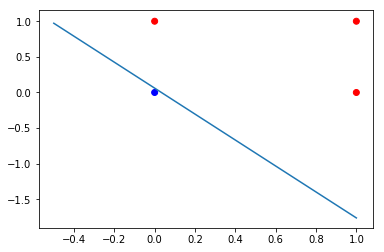

In [9]:
colormap = {1: 'b', 0: 'r'}
colors = [colormap[x] for x in y]

x = np.arange(-0.5, 1.5, 0.5)

plt.scatter(X.T[1], X.T[2], color=colors)
plt.plot(x, new_W[0]/new_W[2] - (new_W[1]/new_W[2]) * x)

# 4 Funções de Ativação